# **Prediksi Hasil Pendapatan Pekerjaan di Bidang Data Science dan Identifikasi Faktor - Faktor yang Mempengaruhi Nilainya**

#**Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**BUSINESS UNDERSTANDING**

###Business Objective

Tujuan Bisnis dari dataset ini adalah untuk memahami faktor - faktor yang mempengaruhi besar kecilnya gaji di dalam pekerjaan yang berada di dalam lingkup Data Science dan Big Data.

###Assess Situation

Situasi bisnis yang mendasari penelitian ini adalah kurangnya pengetahuan akan pendapatan seseorang yang bekerja di bidang Data Science.

###Data Mining Goals

Hasil pengolahan pada dataset ini bertujuan untuk menganalisis faktor - faktor yang mempengaruhi gaji seseorang yang bekerja di bidang Data Science untuk memberi pemahaman lebih serta gambaran kasar tentang gaji yang akan diterimanya saat ingin melamar pekerjaan di bidang tersebut.

###Project Plan

Rencana dari proyek penelitian dataset ini adalah pertama - tama mengumpulkan data - data yang tersedia dari sumbernya. Selanjutnya data akan di eksplorasi mengenai pola - pola atau variabel - variabel yang berkaitan atau yang memiliki hubungan yang menarik. Lalu data akan dibersihkan dari nilai bias, nilai kosong, maupun nilai yang tidak relevan jika terdapat di dalam dataset tersebut. Dan terakhir data akan diolah dan divisualisasikan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

In [2]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


##**Describe Data**

####Informasi Dasar

In [3]:
print('Jumlah baris = ', df.shape[0])
print('Jumlah kolom = ', df.shape[1])

Jumlah baris =  9355
Jumlah kolom =  12


####Informasi Lanjutan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


0. work_year : jumlah kolom sebanyak 9355 dengan tipe data integer.
1. job_title : jumlah kolom sebanyak 9355 dengan tipe data object(string).
2. job_category : jumlah kolom sebanyak 9355 dengan tipe data object(string).
3. salary_currency : jumlah kolom sebanyak 9355 dengan tipe data object(string).
4. salary : jumlah kolom sebanyak 9355 dengan tipe data integer.
5. salary_in_usd : jumlah kolom sebanyak 9355 dengan tipe data integer.
6. employee_residence : jumlah kolom sebanyak 9355 dengan tipe data object(integer).
7. experience_level : jumlah kolom sebanyak 9355 dengan tipe data object(string).
8. employment_type : jumlah kolom sebanyak 9355 dengan tipe data object(string).
9. work_setting : jumlah kolom sebanyak 9355 dengan tipe data object(string).
10. company_location : jumlah kolom sebanyak 9355 dengan tipe data object(string).
11. company_size : jumlah kolom sebanyak 9355 dengan tipe data object(string).

####Informasi Statistik Deskriptif

In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


Dari sini kita bisa melihat untuk ketiga kolom numerik sama - sama berjumlah 9355. Lalu untuk rata - rata work_year adalah tahun 2022, rata - rata salary di angka 149927(dibulatkan menjadi 150000), dan untuk rata - rata salary_in_usd di angka 150299. untuk standar deviasi dari ketiga kolom secara berurut ialah 0.519470, 63608.835387, dan 63177.372024. Selanjutnya untuk nilai terkecil untuk masing - masing kolom adalah 2020 untuk work_year, 14000 untuk salary, dan 15000 untuk salary_in_usd. Lalu sekitar 25% dari data untuk masing - masing kolom secara berurut adalah 2023, 105200, dan 105700, 50% dari data untuk masing - masing kolom secara berurut adalah 2023, 143860, dan 143000, dan 75% dari data untuk masing - masing kolom adalah 2023, 187000, dan 186723. Dan yang terakhir, nilai terbesar untuk masing - masing kolom adalah 2023 untuk work_year, 450000 untuk salary, dan 450000 juga untuk salary_in_usd.

In [6]:
df.corr(numeric_only=True)

,work_year,salary,salary_in_usd
work_year,1.000000,0.160708,0.166003
salary,0.160708,1.000000,0.991309
salary_in_usd,0.166003,0.991309,1.000000


##**Exploratory Data Analysis**

In [7]:
year = df.groupby('work_year').median(numeric_only=True)
year = year.rename_axis('work_year').reset_index()
year

,work_year,salary,salary_in_usd
0,2020,85000.0,87000.0
1,2021,90000.0,90000.0
2,2022,134000.0,133883.0
3,2023,147100.0,147100.0


Melakukan groupby untuk mengelompokkan data berdasarkan work_year, lalu menghitung nilai tengah dari masing - masing kelompok work_year tersebut.

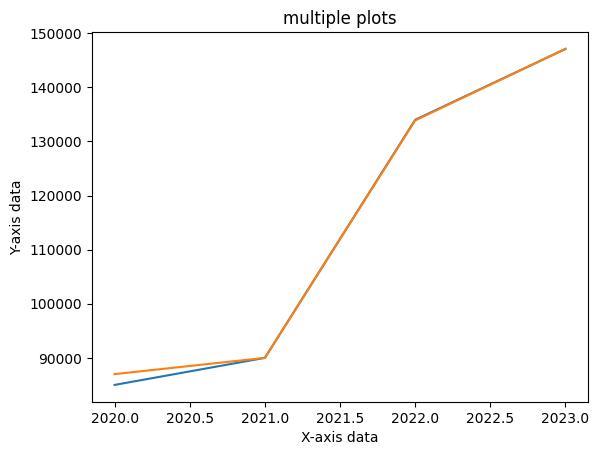

In [8]:
# first plot with X and Y data
plt.plot(year['work_year'], year['salary'])

x1 = [2, 4, 6, 8]
y1 = [3, 5, 7, 9]

# second plot with x1 and y1 data
plt.plot(year['work_year'], year['salary_in_usd'])

plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.show()

Dari sini kita bisa melihat, bahwa baik dari salary maupun salary_in_usd, keduanya mengalami peningkatan nilai untuk tiap tahunnya, dengan peningkatan paling besar ada diantara tahun 2021 - 2022.

In [9]:
job_title = df[['job_title', 'salary_in_usd']]
job_title = job_title.groupby('job_title').median()
job_title = job_title.rename_axis('job_title').reset_index()
job_title = job_title.sort_values(by=['salary_in_usd'], ascending=False).head(10)
job_title

,job_title,salary_in_usd
8,Analytics Engineering Manager,399880.0
68,Data Science Tech Lead,375000.0
107,Managing Director Data Science,300000.0
87,Head of Machine Learning,259000.0
6,AWS Data Architect,258000.0
28,Cloud Data Architect,250000.0
85,Head of Data,226500.0
80,Director of Data Science,217000.0
0,AI Architect,209968.0
63,Data Science Director,201000.0


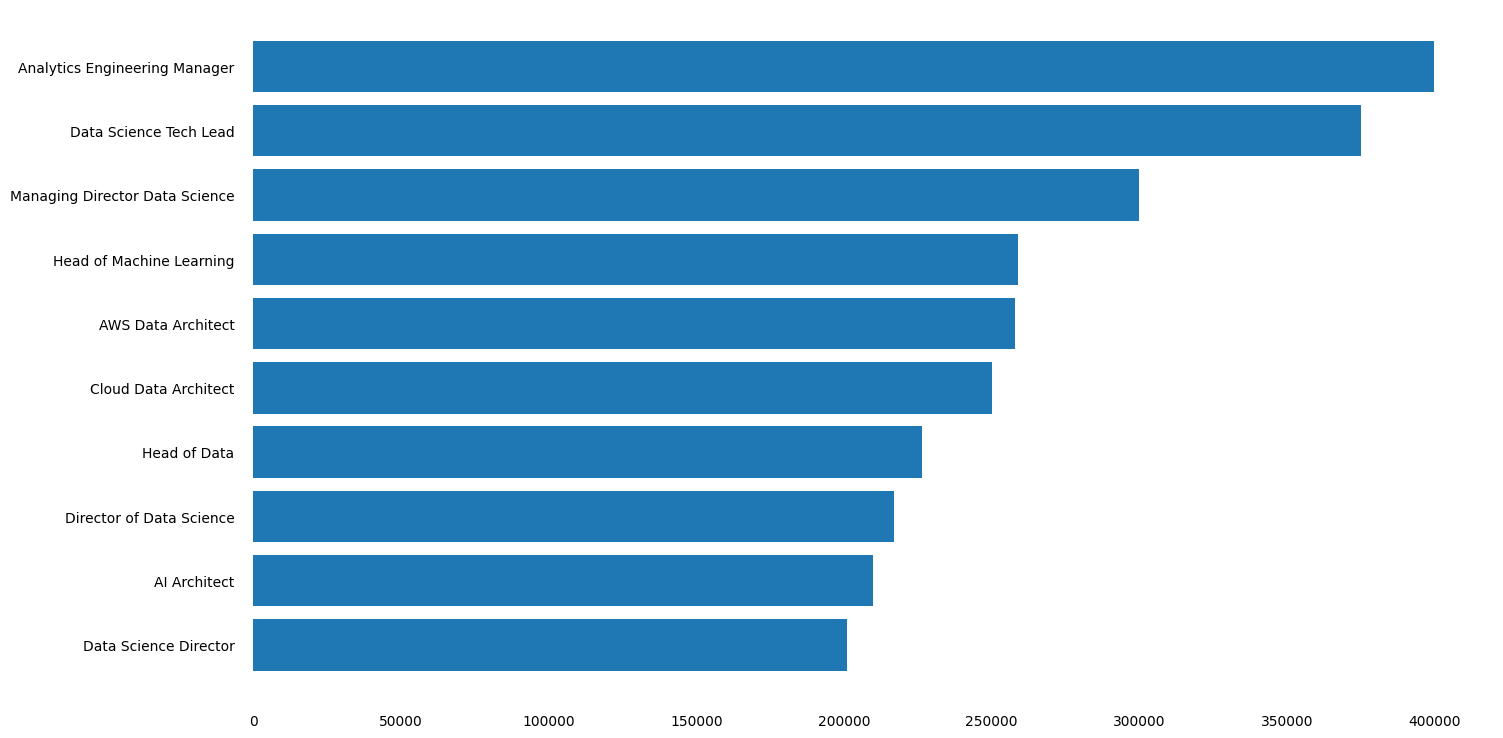

In [10]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(job_title['job_title'], job_title['salary_in_usd'])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines

# Show top values
ax.invert_yaxis()

plt.show()

Dari sini kita bisa melihat, dari top 10 job_title yang ada, Analytics Engineering Manager menjadi pekerjaan yang memiliki salary paling tinggi dalam US Dollar.

##**Verify Data Quality**

####Missing Values

In [11]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

Dapat dilihat bahwa dataset ini semua kolomnya bersih dari missing values, dengan dibuktikan jumlah 0 missing values untuk setiap kolom dari output di atas.

####Outliers Values

<Axes: >

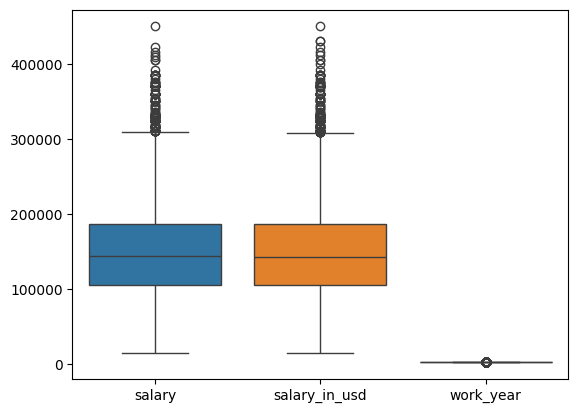

In [12]:

sns.boxplot(data=[df['salary'], df['salary_in_usd'], df['work_year']])

Dapat dilihat disini ternyata di dataset ini, jumlah outlier terbilang cukup banyak. Baik di salary maupun di salary_in_usd.

####Duplicated Values

In [13]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

4014

Disini dapat dilihat bahwa jumlah duplicate values ada sebanyak 4014 baris.

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [14]:
print((df.isna().sum() / len(df)) * 100)

work_year             0.0
job_title             0.0
job_category          0.0
salary_currency       0.0
salary                0.0
salary_in_usd         0.0
employee_residence    0.0
experience_level      0.0
employment_type       0.0
work_setting          0.0
company_location      0.0
company_size          0.0
dtype: float64


Dapat terlihat disini bahwa persentase untuk missing values adalah 0.0 untuk semua kolom feature. Maka dari itu, dari data ini tidak perlu dilakukan penghapusan maupun imputasi missing values.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [15]:
df[df.duplicated()]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
64,2023,Data Analyst,Data Analysis,USD,75000,75000,United States,Entry-level,Full-time,In-person,United States,M
111,2023,Research Scientist,Data Science and Research,USD,165000,165000,United States,Mid-level,Full-time,Remote,United States,M
112,2023,Research Scientist,Data Science and Research,USD,118800,118800,United States,Mid-level,Full-time,Remote,United States,M
115,2023,Data Engineer,Data Engineering,USD,184000,184000,United States,Mid-level,Full-time,In-person,United States,M
116,2023,Data Engineer,Data Engineering,USD,123000,123000,United States,Mid-level,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9079,2022,Data Scientist,Data Science and Research,USD,78000,78000,United States,Mid-level,Full-time,Remote,United States,M
9080,2022,Data Engineer,Data Engineering,USD,135000,135000,United States,Senior,Full-time,Remote,United States,M
9081,2022,Data Engineer,Data Engineering,USD,115000,115000,United States,Senior,Full-time,Remote,United States,M
9214,2021,Data Engineer,Data Engineering,USD,200000,200000,United States,Mid-level,Full-time,Remote,United States,L


In [16]:
df.duplicated().sum()

4014

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [17]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
work_year,20.331374
salary,1.539284
salary_in_usd,1.688936


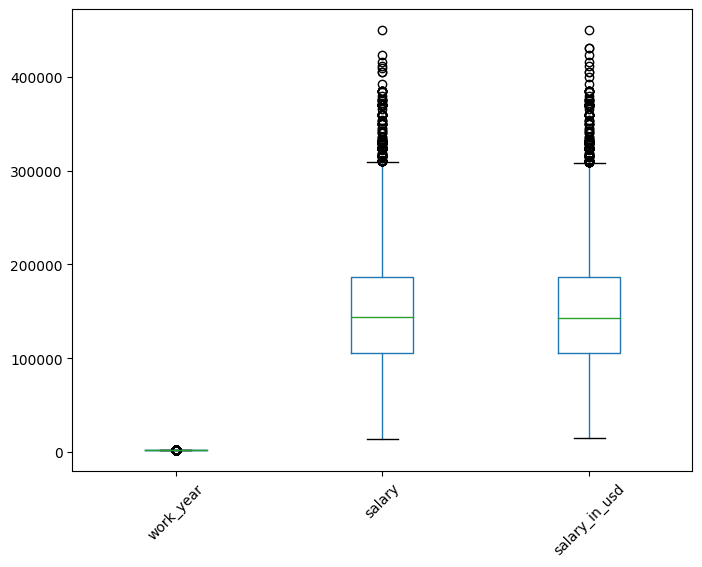

In [18]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

Dapat dilihat disini untuk feature salary dan salary_in_usd memiliki outliers yang cukup banyak, sehingga perllu dilakukan cleaning.

#####**Imputasi Outliers**

In [19]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['salary_in_usd']=np.where(df['salary_in_usd']>upper_whisker,upper_whisker,np.where(df['salary_in_usd']<lower_whisker,lower_whisker,df['salary_in_usd']))

Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['salary']=np.where(df['salary']>upper_whisker,upper_whisker,np.where(df['salary']<lower_whisker,lower_whisker,df['salary']))

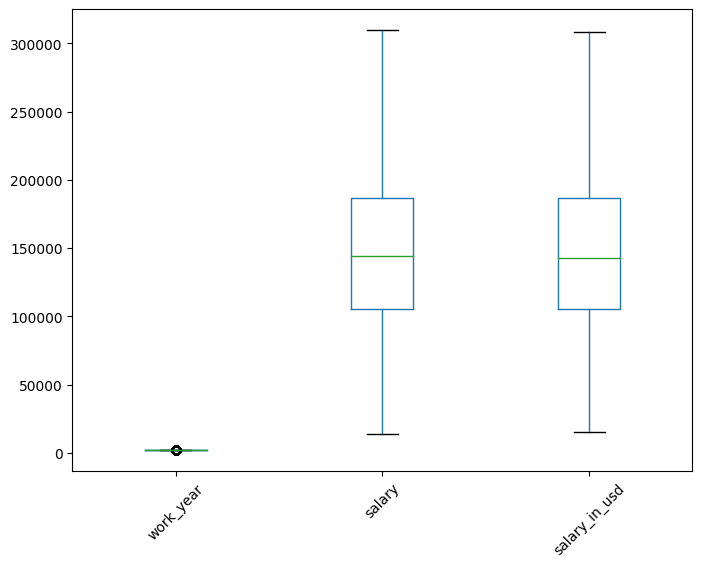

In [20]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

Maka data telah bersih dari outliers setelah dilakukan imputasi.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [21]:
df['salary_in_usd'].describe()

count      9355.000000
mean     149731.000641
std       61457.236112
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      308257.500000
Name: salary_in_usd, dtype: float64

In [22]:
def categorize(x):
    if x < 105000:
        return 'Low'
    elif 105000 <= x < 185000:
        return 'Middle'
    else:
        return 'High'

df['salary_category'] = df['salary_in_usd'].apply(categorize)

###**Pengecekkan Hasil**

In [23]:
df.head(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_category
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L,Low
1,2023,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M,High
2,2023,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M,Low
3,2023,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,Senior,Full-time,In-person,United States,M,High
4,2023,Data Scientist,Data Science and Research,USD,93300.0,93300.0,United States,Senior,Full-time,In-person,United States,M,Low
5,2023,Data Scientist,Data Science and Research,USD,130000.0,130000.0,United States,Senior,Full-time,Remote,United States,M,Middle
6,2023,Data Scientist,Data Science and Research,USD,100000.0,100000.0,United States,Senior,Full-time,Remote,United States,M,Low
7,2023,Machine Learning Researcher,Machine Learning and AI,USD,224400.0,224400.0,United States,Mid-level,Full-time,In-person,United States,M,High
8,2023,Machine Learning Researcher,Machine Learning and AI,USD,138700.0,138700.0,United States,Mid-level,Full-time,In-person,United States,M,Middle
9,2023,Data Engineer,Data Engineering,USD,210000.0,210000.0,United States,Executive,Full-time,Remote,United States,M,High


Disini kita menambahkan feature baru salary_category untuk mengkategorikan gaji dalam usd.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [24]:
df_corr = df.corr(numeric_only=True)
df_corr

,work_year,salary,salary_in_usd
work_year,1.000000,0.166341,0.172281
salary,0.166341,1.000000,0.991927
salary_in_usd,0.172281,0.991927,1.000000


Dapat dilihat untuk korelasi antar feature untuk yang memiliki nilai hanya angka adalah seperti ini. Karena kolom - kolom atau feature - feature lain tidak terlihat disini, maka kita tidak akan melakukan drop column untuk feature - feature numerikal di atas.

#**Data Transformation**

###**Mapping**

In [25]:
df['salary_category'] = df['salary_category'].map({'High':0, 'Middle':1, 'Low':2}).astype(int)
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_category
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L,2
1,2023,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M,0
2,2023,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M,2
3,2023,Data Scientist,Data Science and Research,USD,212000.0,212000.0,United States,Senior,Full-time,In-person,United States,M,0
4,2023,Data Scientist,Data Science and Research,USD,93300.0,93300.0,United States,Senior,Full-time,In-person,United States,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000.0,165000.0,United States,Senior,Full-time,Remote,United States,L,1
9351,2020,Data Scientist,Data Science and Research,USD,309700.0,308257.5,United States,Senior,Full-time,Remote,United States,L,0
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000.0,151000.0,United States,Mid-level,Full-time,Remote,United States,L,1
9353,2020,Data Scientist,Data Science and Research,USD,105000.0,105000.0,United States,Entry-level,Full-time,Remote,United States,S,1


###**Encoding**

In [28]:
df = pd.get_dummies(df)
df.head()

,work_year,salary,salary_in_usd,salary_category,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S
0,2023,88000.0,95012.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2023,186000.0,186000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2023,81800.0,81800.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2023,212000.0,212000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2023,93300.0,93300.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Dataset = https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data